In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Cargando los datos

Para mas información sobre los datos: https://datos.gob.mx/busca/dataset/indice-de-marginacion-carencias-poblacionales-por-localidad-municipio-y-entidad/resource/36698e5c-79e7-4c74-b48c-2edb9719decc

Estos fueron proporcionados por el Consejo Nacional de Población (CONAPO).

In [2]:
indices_marginacion = pd.read_csv("Base_Indice_de_marginacion_municipal_90-15.csv", encoding = "ISO-8859-1", index_col="MUN")

## Visualizar de manera muy general los datos
Más que nada para saber la cantidad de datos que estamos manejando

In [3]:
print(indices_marginacion.shape,"\n")
print(list(indices_marginacion.columns))

(14646, 22) 

['CVE_ENT', 'ENT', 'CVE_MUN', 'POB_TOT', 'VP', 'ANALF', 'SPRIM', 'OVSDE', 'OVSEE', 'OVSAE', 'VHAC', 'OVPT', 'PL<5000', 'PO2SM', 'OVSD', 'OVSDSE', 'IM', 'GM', 'IND0A100', 'LUG_NAC', 'LUGAR_EST', 'AÑO']


In [4]:
indices_marginacion.head(15)

,CVE_ENT,ENT,CVE_MUN,POB_TOT,VP,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,...,PL<5000,PO2SM,OVSD,OVSDSE,IM,GM,IND0A100,LUG_NAC,LUGAR_EST,AÑO
MUN,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,1,Aguascalientes,1001,877190,-,2.06,9.54,0.31,0.16,0.72,...,8.73,31.13,-,-,-1.676,Muy bajo,-,2408,11,2015
Aguascalientes,1,Aguascalientes,1001,797010,-,2.59,11.48,0.49,0.31,0.77,...,8.73,29.9,-,-,-1.768,Muy bajo,7.69,2409,-,2010
Aguascalientes,1,Aguascalientes,1001,723043,-,3.19,13.61,0.77,0.54,1.54,...,8.21,28.37,-,-,-1.831,Muy bajo,-,2419,11,2005
Aguascalientes,1,Aguascalientes,1001,643419,-,3.86,18.04,-,1.12,0.88,...,7.67,37.24,-,1.5,-1.871,Muy bajo,-,2408,11,2000
Aguascalientes,1,Aguascalientes,1001,582827,121790,4.53,-,-,1.62,1.14,...,-,-,2.12,-,-1.735,Muy bajo,-,2393,-,1995
Aguascalientes,1,Aguascalientes,1001,506274,-,6.05,27.99,6.55,3.64,3,...,11.47,58.36,-,-,-1.833,Muy bajo,-,2341,9,1990
Jesús María,1,Aguascalientes,1005,120405,-,3.26,13.73,0.44,0.37,0.73,...,45.17,33.77,-,-,-1.256,Muy bajo,-,2229,10,2015
Jesús María,1,Aguascalientes,1005,99590,-,3.76,18.21,1.26,1.17,1.43,...,45.17,31.15,-,-,-1.262,Muy bajo,13.411,2202,-,2010
Jesús María,1,Aguascalientes,1005,82623,-,5.33,23.64,1.57,1.4,2.48,...,41.58,36.01,-,-,-1.234,Muy bajo,-,2188,9,2005


### Comenzamos a manejar la información
Como primer paso, modificaremos el tipo de datos en que se maneja cada columna a uno más adecuado para su estudio y asi revisar cuantos datos nos faltan.

In [5]:
colsNoFloat = ['ENT', 'CVE_ENT', 'CVE_MUN', 'LUGAR_EST', 'LUG_NAC', 'IND0A100', 'AÑO', 'GM', 'POB_TOT']
colsFloat = list(set(indices_marginacion.columns) - set(colsNoFloat))
for cols in colsFloat:
    indices_marginacion[cols] = pd.to_numeric(indices_marginacion[cols], downcast='float', errors='coerce')

colsInt = ['LUGAR_EST', 'LUG_NAC', 'IND0A100', 'AÑO', 'POB_TOT']
for cols in colsInt:
    indices_marginacion[cols] = pd.to_numeric(indices_marginacion[cols], downcast='integer', errors='coerce')

indices_marginacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14646 entries, Aguascalientes to -
Data columns (total 22 columns):
CVE_ENT      14646 non-null object
ENT          14646 non-null object
CVE_MUN      14646 non-null object
POB_TOT      14646 non-null int32
VP           2428 non-null float32
ANALF        14645 non-null float32
SPRIM        12217 non-null float32
OVSDE        9774 non-null float32
OVSEE        14645 non-null float32
OVSAE        14645 non-null float32
VHAC         12217 non-null float32
OVPT         12217 non-null float32
PL<5000      12218 non-null float32
PO2SM        12217 non-null float32
OVSD         2428 non-null float32
OVSDSE       2443 non-null float32
IM           14640 non-null float32
GM           14646 non-null object
IND0A100     2456 non-null float64
LUG_NAC      14640 non-null float64
LUGAR_EST    9756 non-null float64
AÑO          14646 non-null int16
dtypes: float32(13), float64(3), int16(1), int32(1), object(4)
memory usage: 1.7+ MB


Con los resultados anteriores visualizamos los datos que tenemos y eliminamos aquellas columnas que no nos brindan información reelevante o que carecen de datos.

In [6]:
indices_marginacion = indices_marginacion.drop(columns=['LUG_NAC','LUGAR_EST','GM', 'VP', 'IND0A100'])
indices_marginacion = indices_marginacion.drop(columns=['CVE_ENT', 'CVE_MUN','OVSD', 'OVSDSE', 'OVSDE'])
indices_marginacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14646 entries, Aguascalientes to -
Data columns (total 12 columns):
ENT        14646 non-null object
POB_TOT    14646 non-null int32
ANALF      14645 non-null float32
SPRIM      12217 non-null float32
OVSEE      14645 non-null float32
OVSAE      14645 non-null float32
VHAC       12217 non-null float32
OVPT       12217 non-null float32
PL<5000    12218 non-null float32
PO2SM      12217 non-null float32
IM         14640 non-null float32
AÑO        14646 non-null int16
dtypes: float32(9), int16(1), int32(1), object(1)
memory usage: 829.6+ KB


Realizamos imputación de datos, reemplazando todos aquellos que se no tenían un valor, con el promedio de toda su columna.

In [7]:
#Cambio de nombre a columna para poder manejarla con mayor facilidad.
indices_marginacion = indices_marginacion.rename(columns={'PL<5000': 'P_5000'})

indices_marginacion['ANALF'] = indices_marginacion.ANALF.fillna(indices_marginacion['ANALF'].mean())
indices_marginacion['SPRIM'] = indices_marginacion.SPRIM.fillna(indices_marginacion['SPRIM'].mean())
indices_marginacion['OVSEE'] = indices_marginacion.OVSEE.fillna(indices_marginacion['OVSEE'].mean())
indices_marginacion['OVSAE'] = indices_marginacion.OVSAE.fillna(indices_marginacion['OVSAE'].mean())
indices_marginacion['VHAC'] = indices_marginacion.VHAC.fillna(indices_marginacion['VHAC'].mean())
indices_marginacion['OVPT'] = indices_marginacion.OVPT.fillna(indices_marginacion['OVPT'].mean())
indices_marginacion['P_5000'] = indices_marginacion.P_5000.fillna(indices_marginacion['P_5000'].mean())
indices_marginacion['PO2SM'] = indices_marginacion.PO2SM.fillna(indices_marginacion['PO2SM'].mean())
indices_marginacion['IM'] = indices_marginacion.IM.fillna(indices_marginacion['IM'].mean())

indices_marginacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14646 entries, Aguascalientes to -
Data columns (total 12 columns):
ENT        14646 non-null object
POB_TOT    14646 non-null int32
ANALF      14646 non-null float32
SPRIM      14646 non-null float32
OVSEE      14646 non-null float32
OVSAE      14646 non-null float32
VHAC       14646 non-null float32
OVPT       14646 non-null float32
P_5000     14646 non-null float32
PO2SM      14646 non-null float32
IM         14646 non-null float32
AÑO        14646 non-null int16
dtypes: float32(9), int16(1), int32(1), object(1)
memory usage: 829.6+ KB


### Visualizar los datos
A continuación, manejaremos la información para generar gráficos, tratando de entender mejor los datos que tenemos.

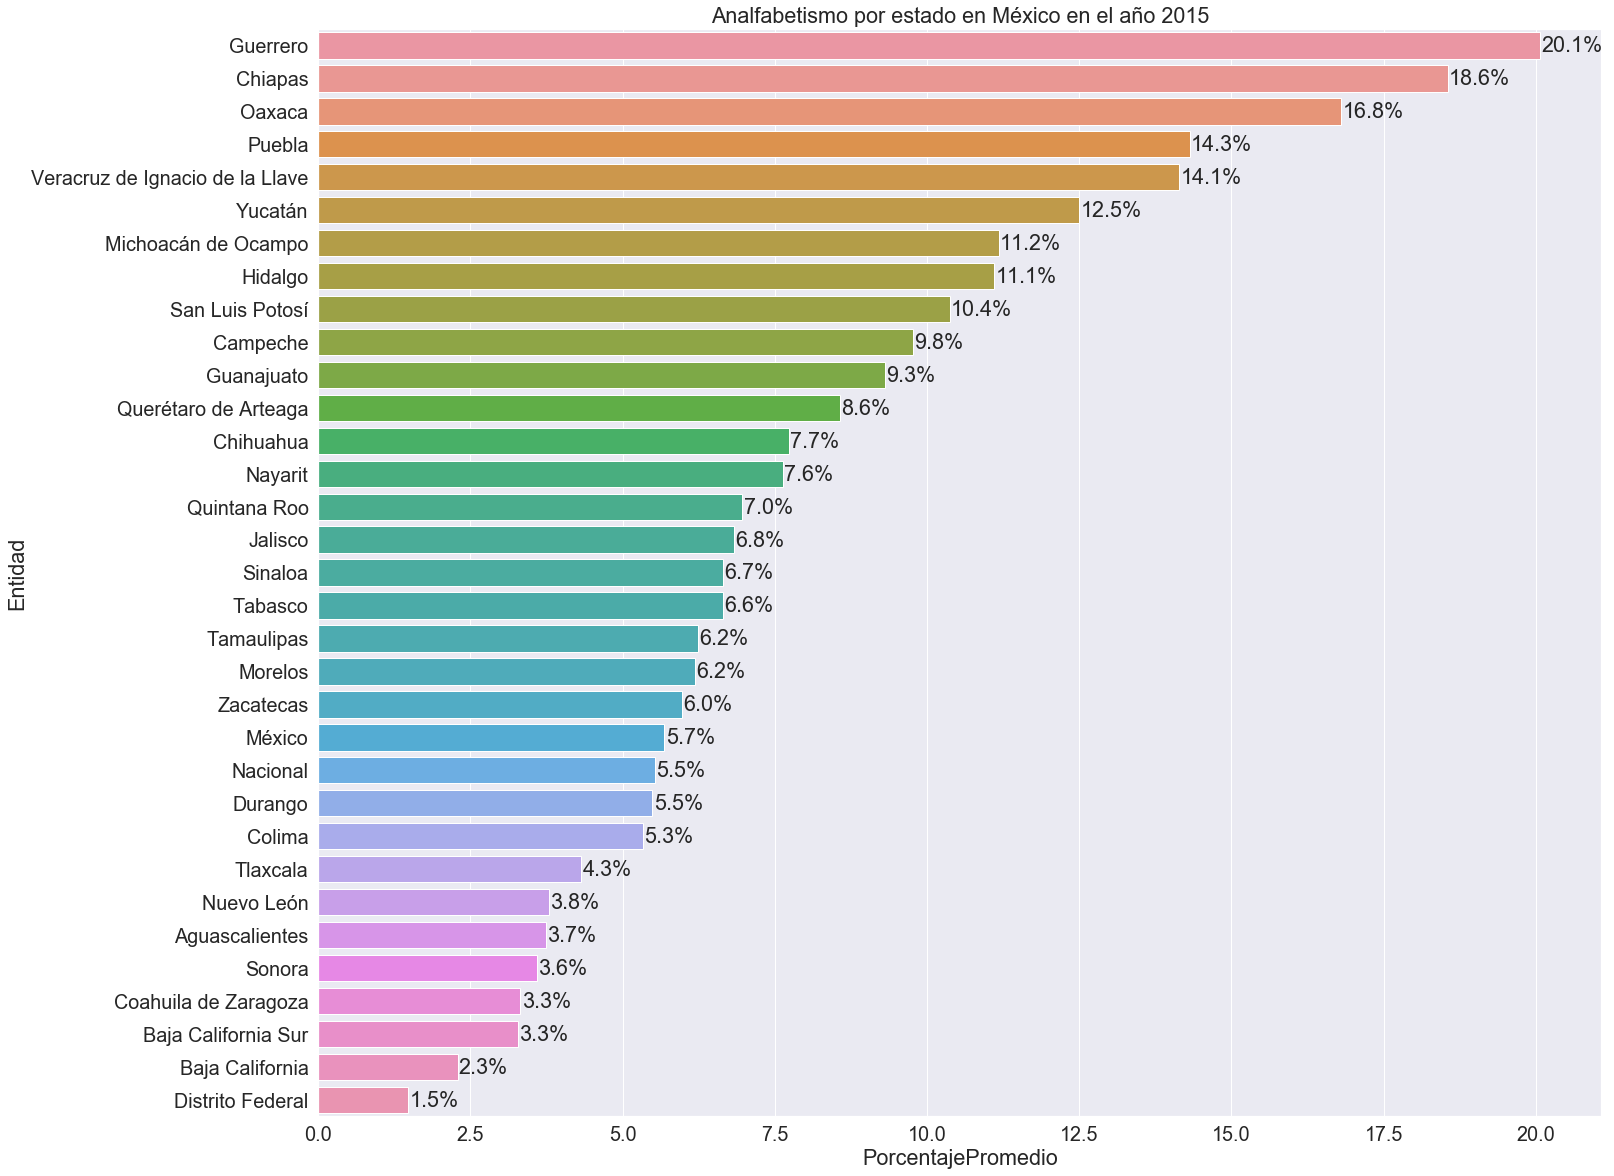

In [8]:
grupo_entidad_año = indices_marginacion.groupby(['ENT','AÑO'])
avrANALF2015 = []

for entidad in indices_marginacion.ENT.unique():
    # Se obitenen los promedios de la columna ANALF por entidad federativa con datos del año 2015
    avrANALF2015.append(grupo_entidad_año.get_group((entidad,2015))['ANALF'].mean())

# Se genera un data frame para relacionar cada entidad con su promedio sobre la columna ANALF
ANALF_2015 = pd.DataFrame({'Entidad':indices_marginacion.ENT.unique(), 'PorcentajePromedio':avrANALF2015})

ANALF_2015 = ANALF_2015.sort_values(by='PorcentajePromedio', ascending=False)

# Graficamos
sns.set(font_scale=1.8)
plt.figure(figsize=(23,20))
plt.title('Analfabetismo por estado en México en el año 2015')
ANALF_entidades = sns.barplot(x = ANALF_2015.PorcentajePromedio, y = ANALF_2015.Entidad)
for p in ANALF_entidades.patches:
        x, y = p.get_x() + p.get_width() + 0.02 , p.get_y() + p.get_height() - 0.2
        ANALF_entidades.annotate('{:.1f}%'.format(p.get_width()), (x, y))

De igual manera se pueden obtener por municipio de cada entidad federativa.

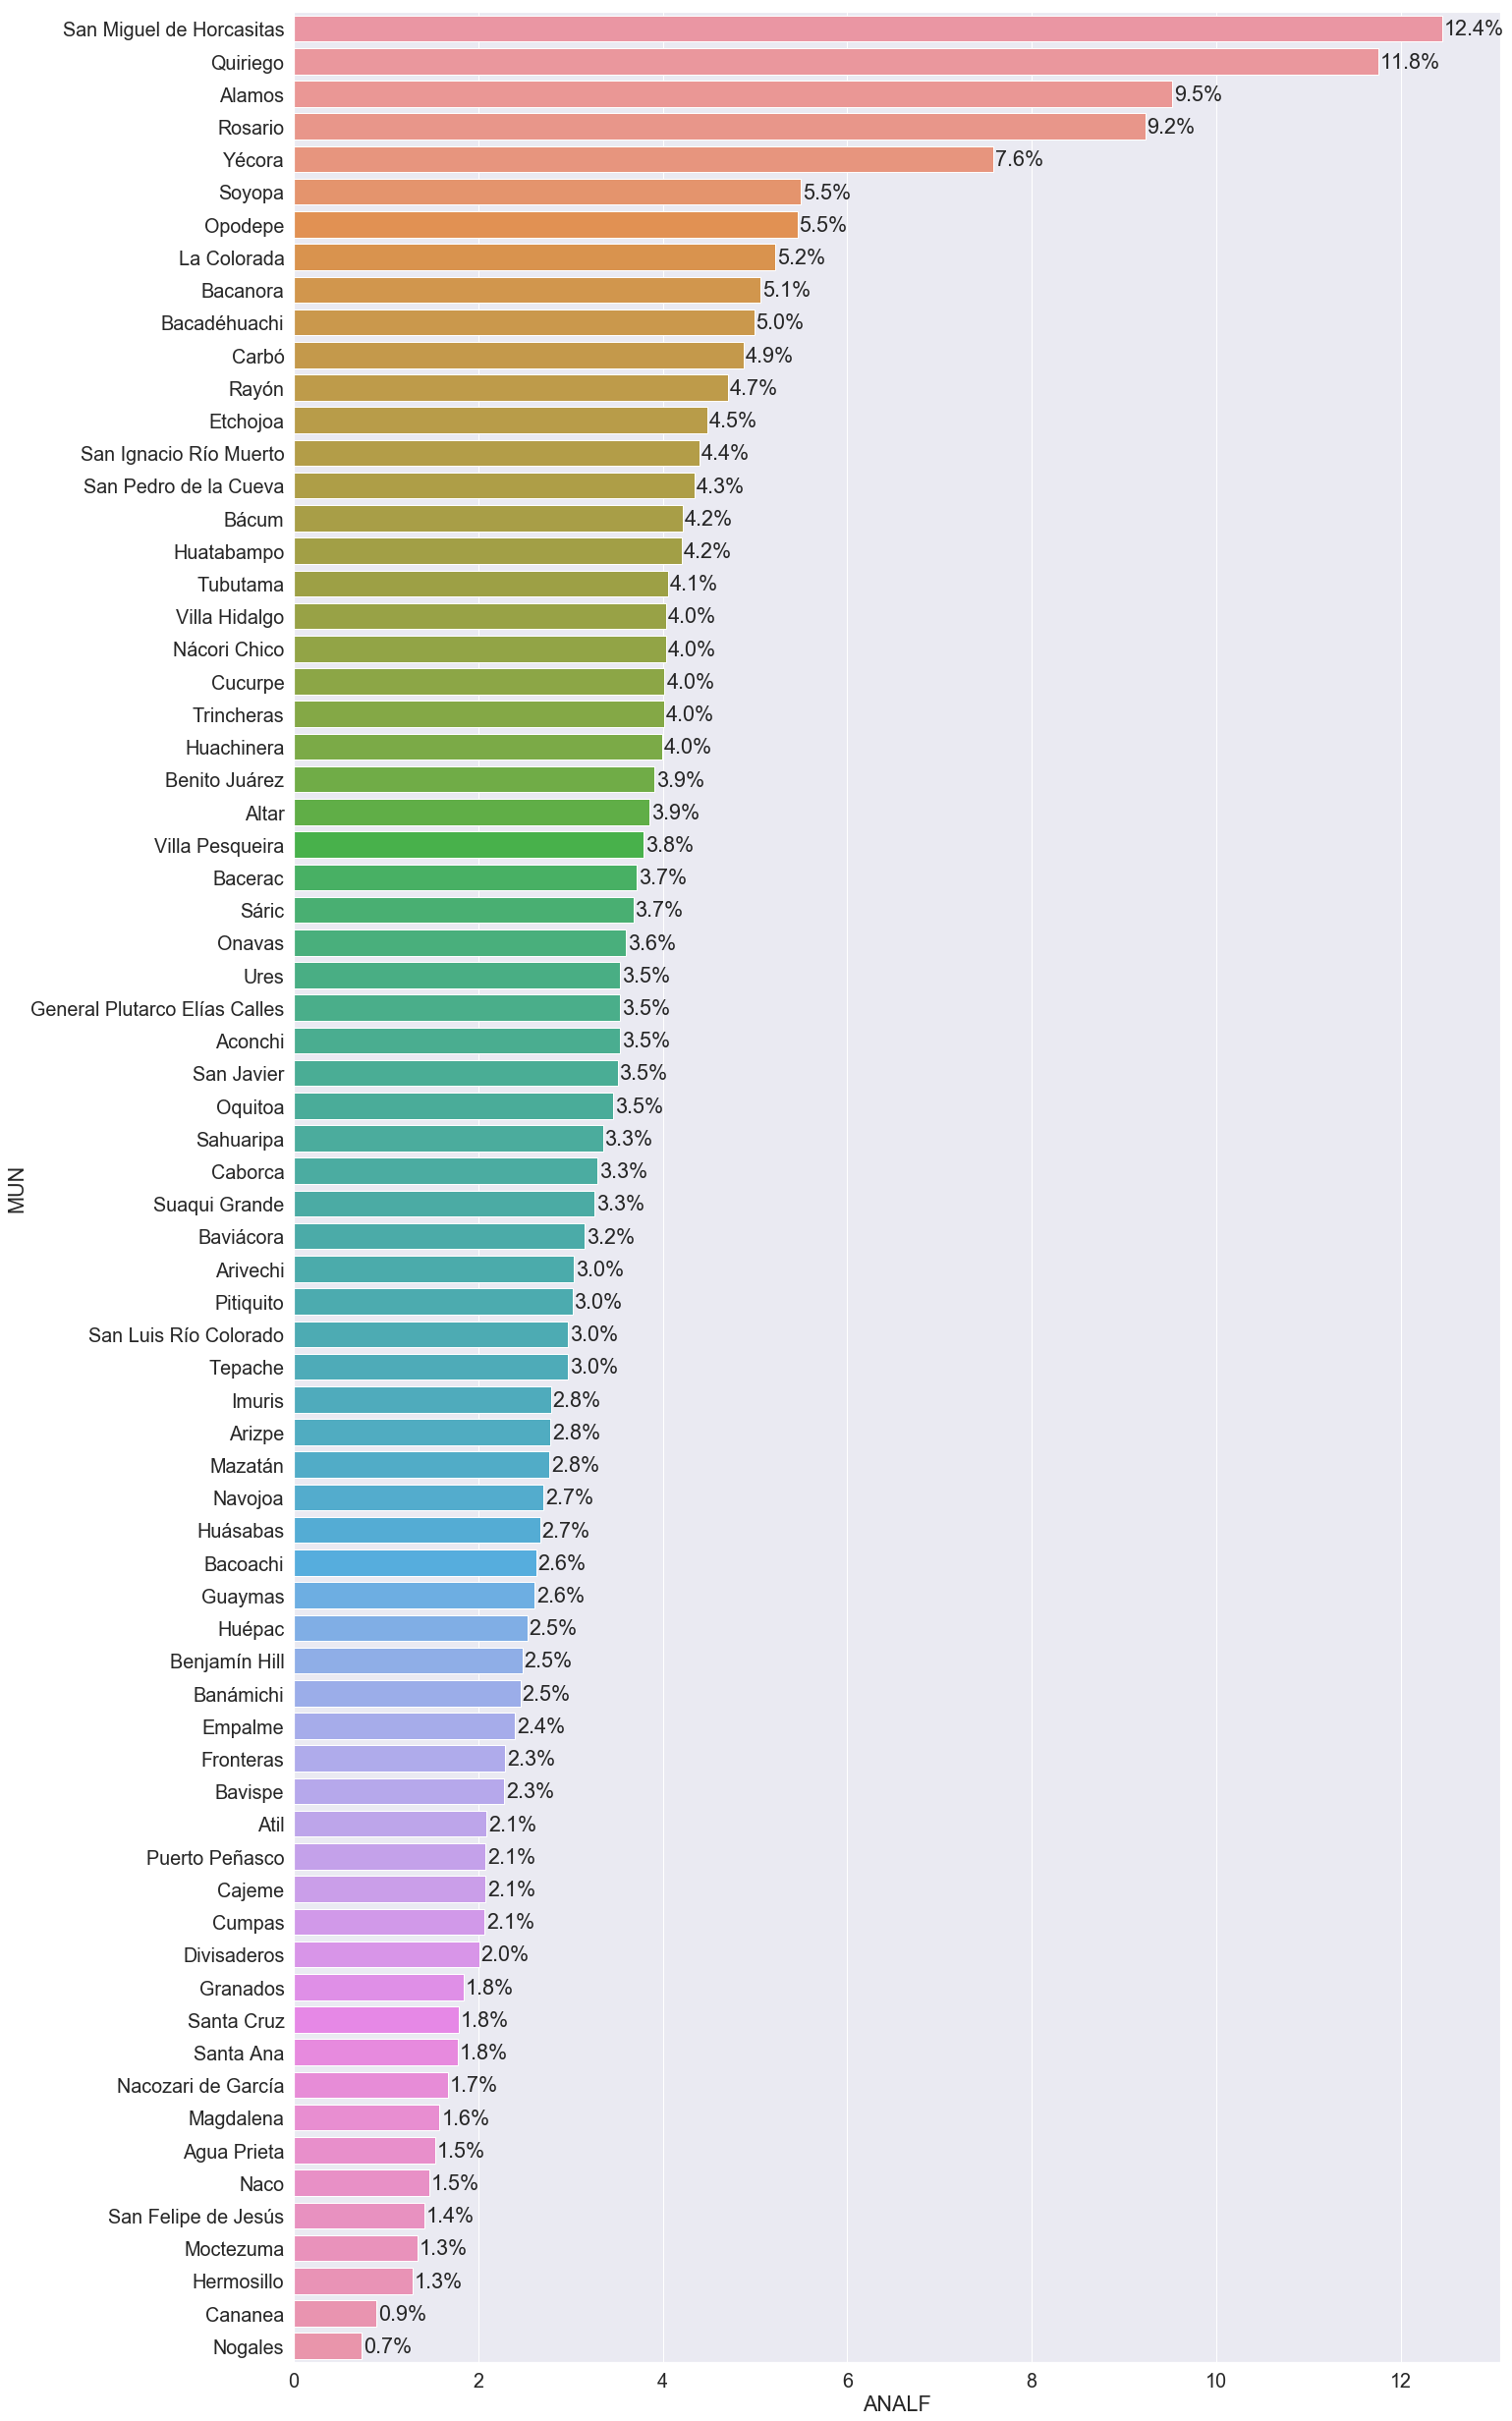

In [9]:
sonora2015 = grupo_entidad_año.get_group(('Sonora', 2015)).sort_values(by='ANALF',ascending=False)
plt.figure(figsize=(22,44))
ANALF_sonora = sns.barplot(x = sonora2015['ANALF'], y = sonora2015.index)
for p in ANALF_sonora.patches:
        x, y = p.get_x() + p.get_width() + 0.02 , p.get_y() + p.get_height() - 0.2
        ANALF_sonora.annotate('{:.1f}%'.format(p.get_width()), (x, y))

## Entendiendo los datos
Tratamos de etiquetar los datos en base a su indice de marginación en base a los niveles de analfabetismo.

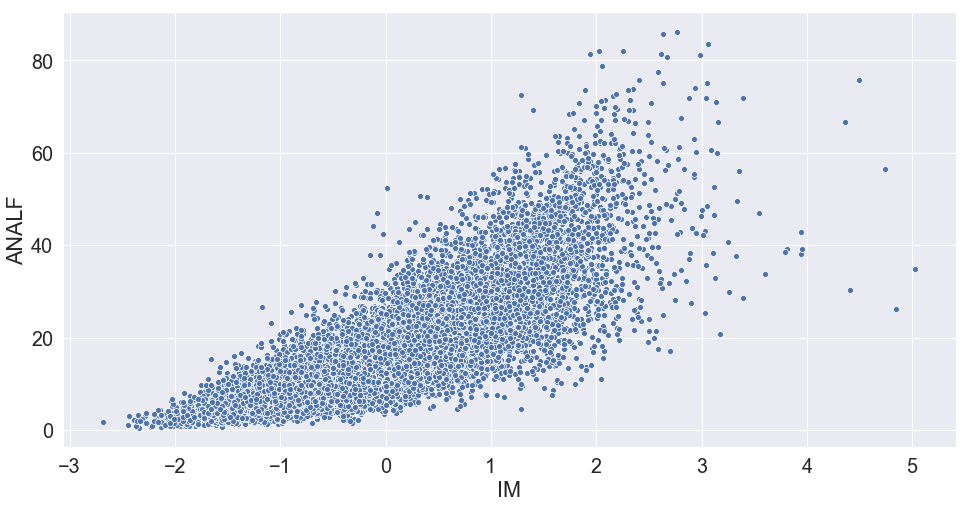

In [10]:
X = indices_marginacion[['ANALF']]
Y = indices_marginacion[['IM']]

plt.figure(figsize=(16,8))
sns.scatterplot(indices_marginacion['IM'], indices_marginacion['ANALF'])

A continuación generamos una curva de codo para determinar el número de clusters que requerimos para un análisis de k-medias

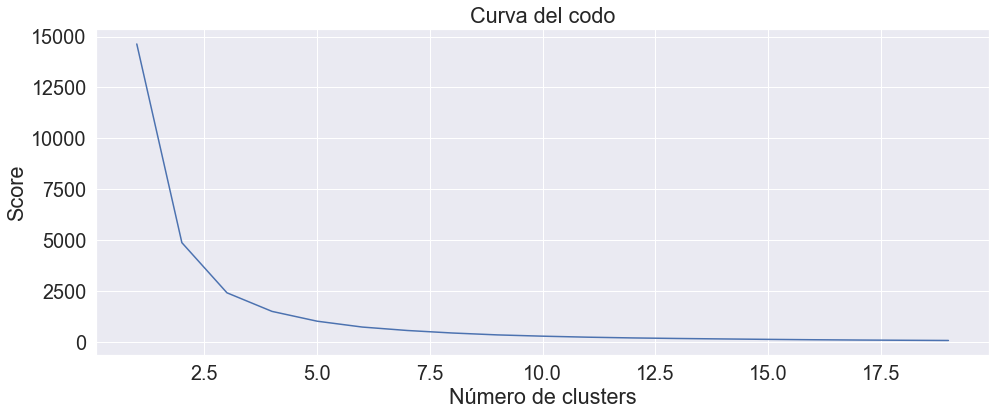

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [-1*kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
plt.figure(figsize=(16,6))
sns.lineplot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Curva del codo')
plt.show()

Implementamos el análisis de las k-medias y utilizamos el algoritmo PCA para controlar los datos que podrían estar muy dispersos.

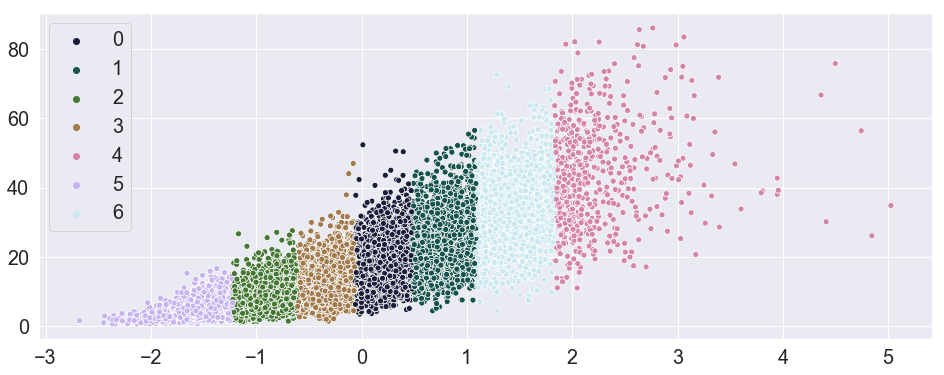

In [12]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

kmeans=KMeans(n_clusters=7)
kmeansoutput=kmeans.fit(Y)

pl.figure(figsize=(16,6))
sns.scatterplot(x=pca_d[:, 0], y=pca_c[:, 0], hue=kmeansoutput.labels_, palette=sns.color_palette("cubehelix", 7))